In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv("wetter_tripbot_zurich_juni.csv", encoding='latin-1')

In [3]:
df

,Stadt,Datum,Temperatur (°C),Bewölkung (%),Regenmenge (mm),Sonnenscheindauer (h)
0,Zürich,01.06.2025,19.2,60,1.2,6.5
1,Zürich,02.06.2025,21,45,NaN,9.0
2,Zürich,02.06.2025,21,45,0.0,9.0
3,Zürich,03.06.2025,22.3,30,0.0,10.2
4,Zürich,04.06.2025,24.1,25,0.0,11.0
5,Zürich,05.06.2025,25,20,0.0,11.5
6,Zürich,06.06.2025,23.8,35,0.5,8.2
7,Zürich,07.06.2025,22,70,4.8,4.0
8,Zürich,06.08.2025,20.5,85,6.2,2.5
9,Zürich,09.06.2025,18.9,90,8.0,1.0


In [6]:
df.shape

(31, 6)

In [7]:
df.dtypes

Stadt                     object
Datum                     object
Temperatur (°C)           object
Bewölkung (%)              int64
Regenmenge (mm)          float64
Sonnenscheindauer (h)    float64
dtype: object

In [8]:
df['Temperatur (°C)']

0      19.2
1        21
2        21
3      22.3
4      24.1
5        25
6      23.8
7        22
8      20.5
9      18.9
10    Regen
11     21.2
12       23
13     24.4
14     26.1
15     27.3
16       28
17     29.2
18       30
19       58
20     26.7
21      NaN
22      NaN
23      NaN
24      NaN
25     19.3
26     20.8
27     22.5
28       24
29     25.2
30       26
Name: Temperatur (°C), dtype: object

In [9]:
mean_temp = pd.to_numeric(df['Temperatur (°C)'], errors='coerce').mean()
df.loc[df['Temperatur (°C)'] == "Regen", 'Temperatur (°C)'] = mean_temp
df.loc[10]

Stadt                        Zürich
Datum                    10.06.2025
Temperatur (°C)           24.980769
Bewölkung (%)                    65
Regenmenge (mm)                 2.1
Sonnenscheindauer (h)           5.0
Name: 10, dtype: object

In [10]:
df['Temperatur (°C)'] = pd.to_numeric(df['Temperatur (°C)'])
df.dtypes

Stadt                     object
Datum                     object
Temperatur (°C)          float64
Bewölkung (%)              int64
Regenmenge (mm)          float64
Sonnenscheindauer (h)    float64
dtype: object

In [11]:
df.isnull().sum()

Stadt                    0
Datum                    0
Temperatur (°C)          4
Bewölkung (%)            0
Regenmenge (mm)          1
Sonnenscheindauer (h)    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stadt                  31 non-null     object 
 1   Datum                  31 non-null     object 
 2   Temperatur (°C)        27 non-null     float64
 3   Bewölkung (%)          31 non-null     int64  
 4   Regenmenge (mm)        30 non-null     float64
 5   Sonnenscheindauer (h)  31 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()

Stadt                    0
Datum                    0
Temperatur (°C)          0
Bewölkung (%)            0
Regenmenge (mm)          0
Sonnenscheindauer (h)    0
dtype: int64

In [15]:
df['Datum'].duplicated()

0     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
25    False
26    False
27    False
28    False
29    False
30    False
Name: Datum, dtype: bool

In [16]:
df = df.drop_duplicates()

In [17]:
df.describe()

,Temperatur (°C),Bewölkung (%),Regenmenge (mm),Sonnenscheindauer (h)
count,26.000000,26.000000,26.000000,26.000000
mean,25.133876,42.692308,1.088462,7.976923
std,7.355065,23.118424,2.181986,4.837794
min,18.900000,10.000000,0.000000,-9.800000
25%,21.400000,25.000000,0.000000,6.125000
50%,24.050000,37.500000,0.000000,9.750000
75%,26.075000,58.750000,1.025000,11.000000
max,58.000000,90.000000,8.000000,12.500000


{'whiskers': [<matplotlib.lines.Line2D at 0x29be4364050>,
 'caps': [<matplotlib.lines.Line2D at 0x29be43642d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29be3bf7ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x29be4364550>],
 'fliers': [<matplotlib.lines.Line2D at 0x29be4364690>],
 'means': []}

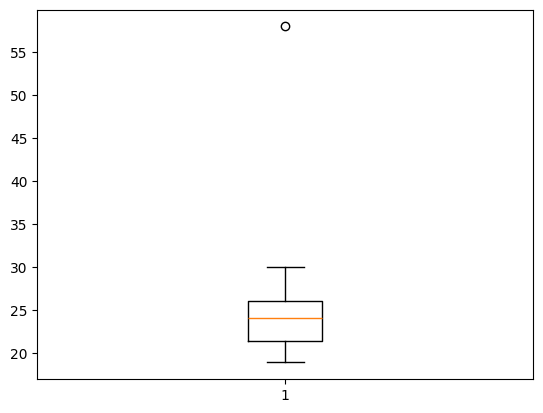

In [18]:
plt.boxplot(df['Temperatur (°C)'])

In [19]:
mean_temp = df['Temperatur (°C)'].mean(skipna=True)
max_temp = df['Temperatur (°C)'].max(skipna=True)
df['Temperatur (°C)'] = df['Temperatur (°C)'].replace(max_temp, mean_temp)

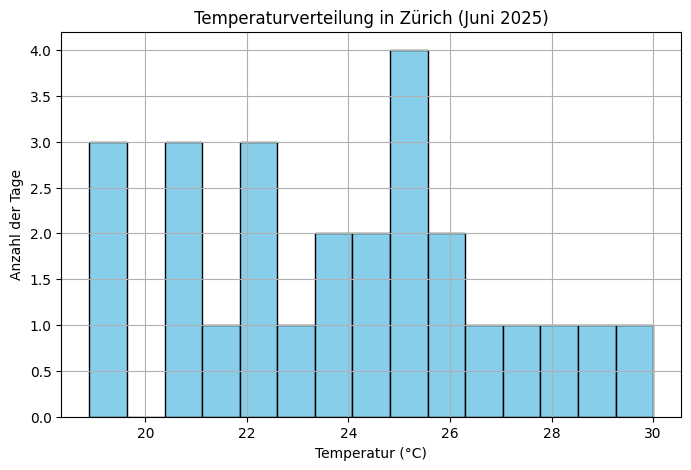

In [22]:
plt.figure(figsize=(8,5))
df['Temperatur (°C)'].hist(bins=15, color='skyblue', edgecolor='black')
plt.title('Temperaturverteilung in Zürich (Juni 2025)')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Anzahl der Tage')
plt.grid(True)
plt.show()

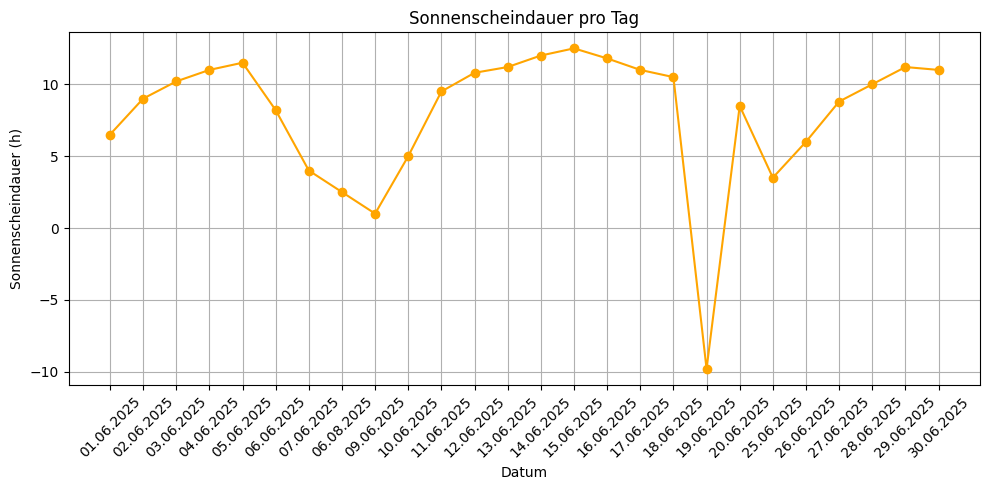

In [23]:
plt.figure(figsize=(10,5))
plt.plot(df['Datum'], df['Sonnenscheindauer (h)'], marker='o', linestyle='-', color='orange')
plt.title('Sonnenscheindauer pro Tag')
plt.xlabel('Datum')
plt.ylabel('Sonnenscheindauer (h)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

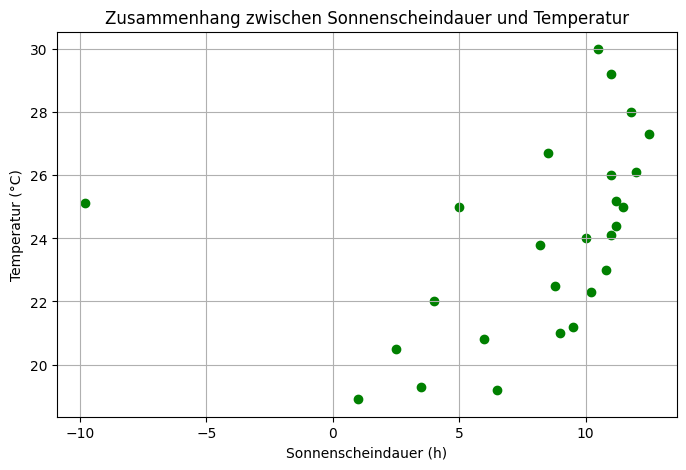

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(df['Sonnenscheindauer (h)'], df['Temperatur (°C)'], color='green')
plt.title('Zusammenhang zwischen Sonnenscheindauer und Temperatur')
plt.xlabel('Sonnenscheindauer (h)')
plt.ylabel('Temperatur (°C)')
plt.grid(True)
plt.show()